In [6]:
import pandas as pd
import datetime as dt
from pathlib import Path
from matplotlib import pyplot
from pandas import DataFrame

from statsmodels.tsa.arima.model import ARIMA

 



                  Open        High         Low       Close     Volume  Day  \
Date                                                                         
2014-01-02  155.887692  155.963959  154.616730  154.989548  119636900    2   
2014-01-03  155.252116  155.565629  154.743740  154.964035   81390600    3   
2014-01-06  155.472507  155.531812  154.277800  154.515045  108028200    6   
2014-01-07  155.133570  155.726683  155.014948  155.464020   86144200    7   
2014-01-08  155.438546  155.760527  154.964056  155.497864   96582300    8   

            Weekday  Week  Month  Year  
Date                                    
2014-01-02        3     1      1  2014  
2014-01-03        4     1      1  2014  
2014-01-06        0     2      1  2014  
2014-01-07        1     2      1  2014  
2014-01-08        2     2      1  2014  


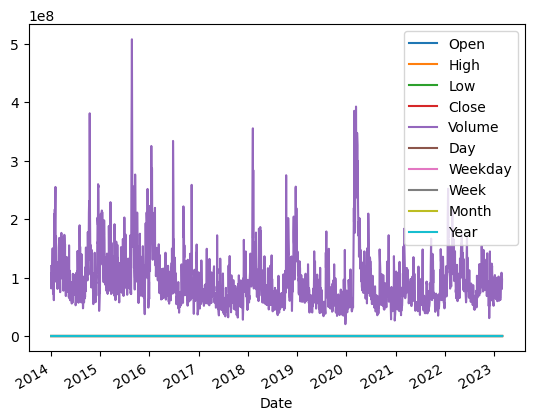

In [9]:
arima_df = pd.read_csv(Path("./Resources/spy.csv"), index_col="Date", parse_dates=True,infer_datetime_format=True)
print(arima_df.head())
arima_df.plot()
# pyplot.show()
arima_df.index = arima_df.index.to_period('M')




                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2305
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6038.691
Date:                Tue, 28 Mar 2023   AIC                          12089.381
Time:                        18:54:01   BIC                          12123.835
Sample:                    01-31-2014   HQIC                         12101.942
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.010     -8.266      0.000      -0.106      -0.066
ar.L2          0.0405      0.010      4.181      0.000       0.022       0.059
ar.L3         -0.0100      0.010     -0.965      0.3

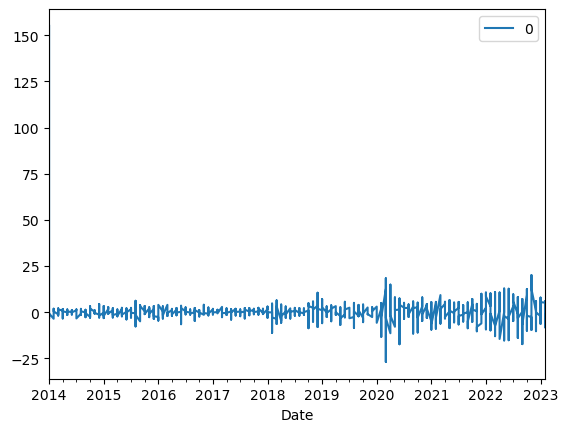

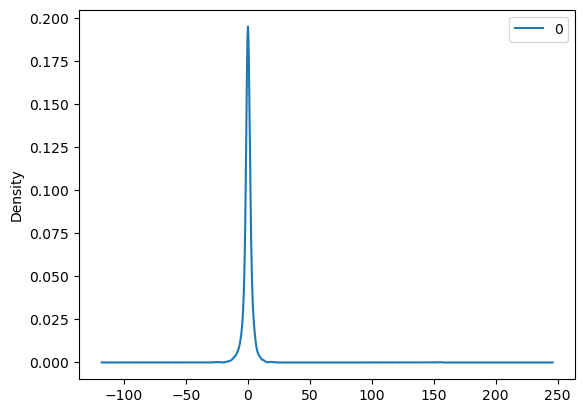

                 0
count  2305.000000
mean      0.179335
std       4.632671
min     -26.865681
25%      -0.911188
50%       0.153871
75%       1.402470
max     154.989548


In [17]:
# fit model
model = ARIMA(arima_df['Close'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())